In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pickle

In [2]:
#normalize X values to help model converge
def normalize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    data = (data - mean) / std
    return data

In [3]:
#retrieve and format data - into labels and examples from the dataset
def features_and_labels(filename_a, filename_b):
    with open(filename_b, 'rb') as f:
        labels = np.load(f).ravel()
    
    data = pd.read_pickle(filename_a)
    #https://stackoverflow.com/questions/22798934/pandas-long-to-wide-reshape-by-two-variables
    data_x = data.pivot(index='id', columns='time', values='FLUX')
    data_x = normalize(data_x)
    data_x = data_x.to_numpy()
    return data_x, labels

In [4]:
training_data_x, training_data_y = features_and_labels("../Kepler-Train.pkl", "../Labels-Train.npy")
testing_data_x, testing_data_y = features_and_labels("../Kepler-Test.pkl", "../Labels-Test.npy")
print(training_data_x)

[[ 0.16825881  0.19314497  0.18304091 ...  0.06897888  0.11216203
   0.14357427]
 [ 0.00287862  0.0049573   0.00732892 ... -0.02199816 -0.01982306
  -0.0208766 ]
 [ 1.71193798  1.59966923  1.60208628 ...  1.02352923  1.00406323
   1.08009872]
 ...
 [-0.31387783 -0.25472808 -0.08343564 ... -0.26660799 -0.05442008
   0.52769713]
 [ 0.80240444  0.81002809  0.92835883 ...  0.79640996  0.63751772
   0.63176608]
 [-0.98553142 -1.49516048 -1.76567205 ...  1.08000185  0.77423713
   0.19702512]]


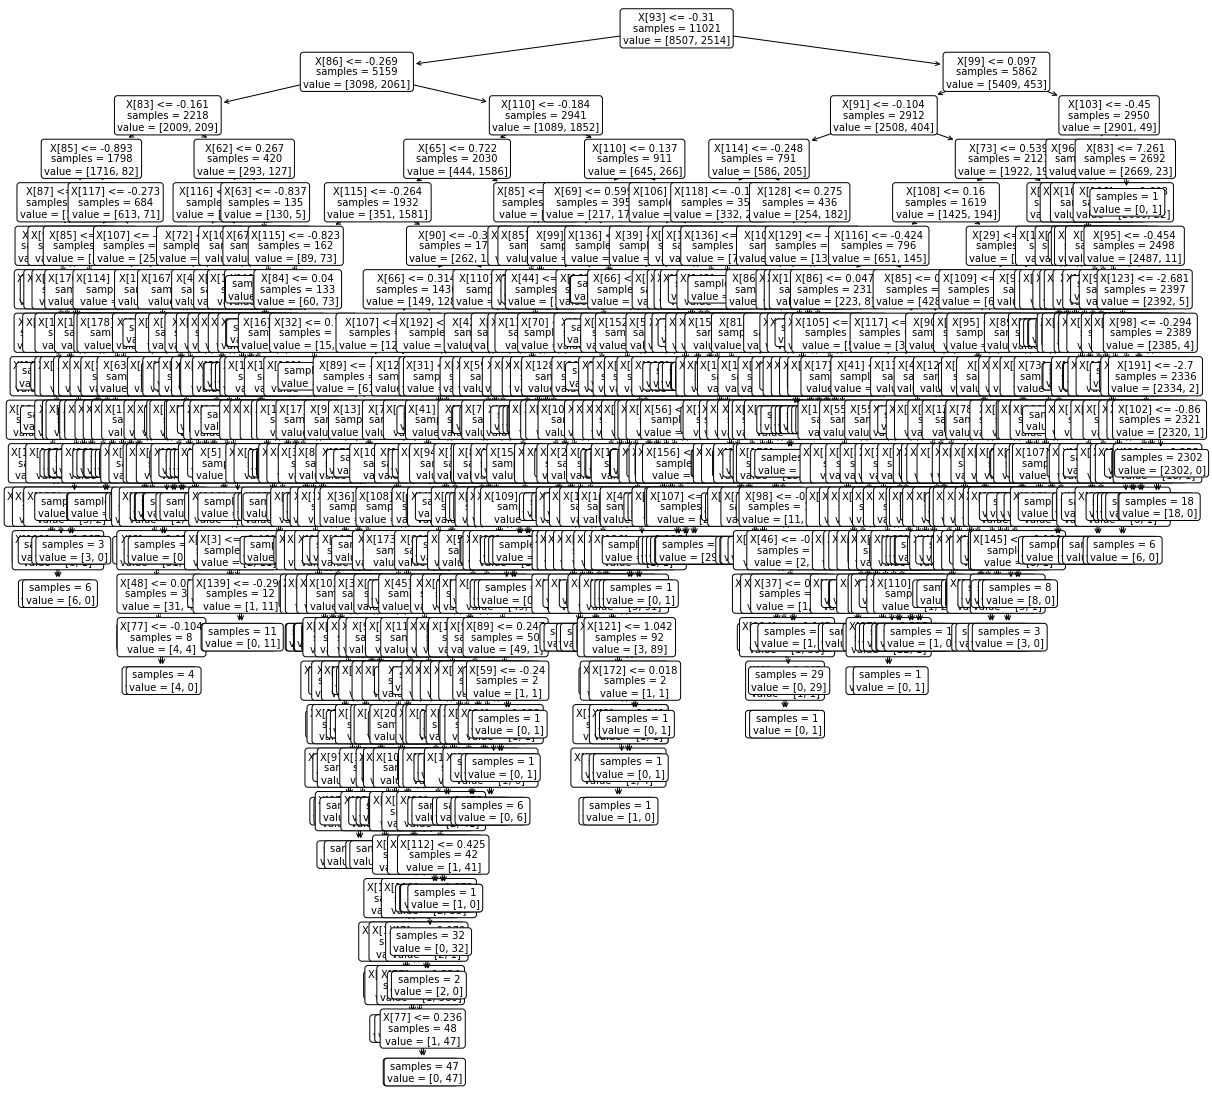

Accuracy percentage:  100.0 %


In [9]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

In [10]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [11]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(testing_data_x)
print("Accuracy percentage: ", accuracy_score(testing_data_y, y_pred)*100, "%")

Accuracy percentage:  100.0 %


In [12]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)